In [ ]:
import numpy as np
import sympy
from sympy import I, latex, S
from IPython.display import display, Latex
import matplotlib.pyplot as plt

# Практическое занятие 9
# Компьютерный практикум по алгебре на Python
## Комплексные числа в sympy

### Алгебраическая форма комплексного числа
$z = a + bi$, $a$ и $b$ вещественные числа, $i=\sqrt{-1}$ мнимая единица, $z$ - комплексное число. В Sympy мнимая единица записывается $I$, в Python $j$.
### Пример 1.
Даны комплексные числа
$$
z_1 = 2 + 3i,\quad z_2 = -3 + i,\quad z_3 = 5i,\quad z_4 = -i,\quad z_5 = -5 - 10i,
$$
вычислить
$$
3z_1 - 5z_2,\quad z_2^2 - 3z_1^3,\quad \sqrt{z_3},\quad z_4^{1 / 6},\quad z_5^{-2 / 7}.
$$

In [ ]:
z1 = 2 + 3 * I
z2 = -3 + I
z3 = 5 * I
z4 = -I
z5 = -5 - 10 * I
complex_numbers = (3 * z1 - 5 * z2, z2 ** 2 - 3 * z1 ** 3, z3 ** sympy.S.Half,
                   z4 ** (sympy.S(1) / 6), z5 ** (-sympy.S(2) / 7))
display(Latex((r'\text{{Комплексные числа }} ' +\
'{}\quad ' * len(complex_numbers)).format(*map(latex,
                                                complex_numbers))))

<IPython.core.display.Latex object>

Упростим выражения $z_2^2 - 3z_1^3$ и $z_5^{-2 / 7}$:

In [ ]:
expr_z2 = z2 ** 2 - 3 * z1 ** 3
expr_z5 = z5 ** (-sympy.S(2) / 7)
display(Latex('{0} = {1},\qquad {2} = {3}'.format(*map(latex, (expr_z2,
                                         expr_z2.simplify(),
                                         expr_z5, expr_z5.simplify())))))

<IPython.core.display.Latex object>

Первое выражение получились в алгебраической форме, а второе нет. Приведем в подходящий вид второе выражение немного позже.
### Пример 2.
Вычисления Примера 1 проделаем для мнимой единицы из Python (numpy использует комплексные числа Python, своих отдельных нет). Для получения комплексных чисел в Python есть встроенная функция complex с аргументами - вещественной и мнимой частями комплексного числа.

In [ ]:
z1 = complex(2, 3)
z2 = complex(-3, 1)
z3 = complex(0, 5)
z4 = complex(0, -1)
z5 = complex(-5, - 10)
print(3 * z1 - 5 * z2, z2 ** 2 - 3 * z1 ** 3, z3 ** (1 / 2),
        z4 ** (1 / 6), z5 ** (-2 / 7), sep=', ')

(21+4j), (146-33j), (1.5811388300841898+1.5811388300841895j), (0.9659258262890683-0.25881904510252074j), (0.4193012965072991+0.2754745230972611j)


Заметим, что у комплексного числа $n$ различных корней степени $n$, а у нас получился только один.

### Пример 3.
Для получения всех корней $n$-й степени комплексного числа в sympy есть функция root, ее аргументы - число (или выражение), степень корня и необязательный параметр - номер корня, по умолчанию 0, что соответствует главном значению корня. Используем ее для получения всех четвертой степени из $1 - i$:

In [ ]:
n = 4
roots_list_3 = [sympy.root(1 - I, n, k) for k in range(n)]
display(Latex(latex(roots_list_3)))

<IPython.core.display.Latex object>

Для экономии памяти (имеет смысл в случае списка большой длины) можно использовать вместо списка генераторы, но нужно помнить, что это одноразовые объекты, их стоит создавать на месте, а не записывать в переменные.

In [ ]:
display(Latex('{0}, {1}, {2}, {3}'.format(*map(latex,\
                                (sympy.root(1 - I, n, k) for k in range(n))))))

<IPython.core.display.Latex object>

Нехорошо явно перечислять количество корней в части '{0}, {1}, {2}, {3}', ведь впоследствии может понадобиться найти пять корней пятой степени или два корня второй. Для более универсальной организации вывода корней на экран можем воспользоваться автоматическим формированием строки с помощью метода строк join. Строка, к которой применяется метод join, используется в качестве разделителя.

In [ ]:
display(Latex(',\ '.join(['{}'] * n).format(*map(latex,\
                                (sympy.root(1 - I, n, k) for k in range(n))))))

<IPython.core.display.Latex object>

Для получения значения выражения, содержащего комплексные числа, в алгебраической форме можно использовать функцию expand_complex:

In [ ]:
display(*map(Latex, map(latex, map(sympy.expand_complex, roots_list_3))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
display(Latex((r',\ '.join(['{}'] * len(roots_list_3))).format(*map(latex,\
                                    map(sympy.expand_complex, roots_list_3)))))

<IPython.core.display.Latex object>

In [ ]:
display(Latex((r',\ '.join([rf'r_{k} = {{{k}}}' for k\
in range(len(roots_list_3))])).format(*map(latex, map(sympy.expand_complex,
                                                      roots_list_3)))))

<IPython.core.display.Latex object>

Если нужна нумерация корней с 1, то можно сделать так

In [ ]:
display(Latex((r',\ '.join([rf'r_{k + 1} = {{{k}}}' for k\
in range(len(roots_list_3))])).format(*map(latex, map(sympy.expand_complex,
                                                      roots_list_3)))))

<IPython.core.display.Latex object>

### Пример 4.
Изобразим на координатной плоскости точки, соответствующие корням из Примера 3, подпишем точки номерами корней и их формулами.

(-1.5, 1.5)

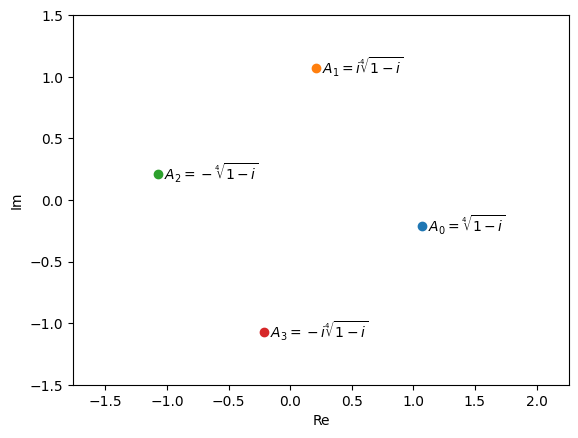

In [ ]:
for x, y, k_complex_z in zip(map(sympy.re, roots_list_3),
                              map(sympy.im, roots_list_3),
                              enumerate(roots_list_3)):
    plt.scatter(x, y)
    k, complex_z = k_complex_z
    plt.annotate(f'$A_{k} = {sympy.latex(complex_z)}$',
            xy=(x, y),
            xytext=(x + 0.05, y - 0.05))
plt.axis('equal')
plt.xlabel("Re")
plt.ylabel("Im")
plt.xlim(-4, 4.5)
plt.ylim(-1.5, 1.5)

Представим комплексные числа в тригонометрической форме

(-1.5, 1.5)

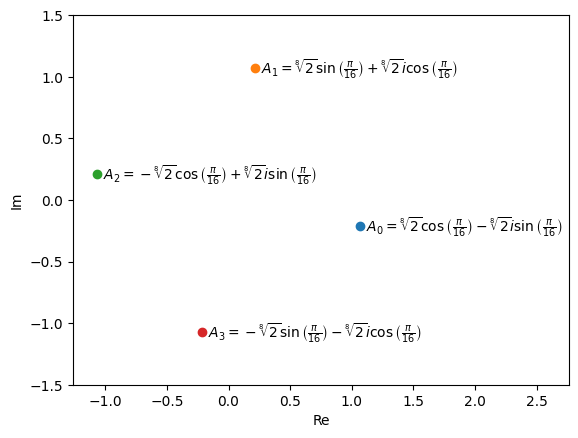

In [ ]:
for x, y, k_complex_z in zip(map(sympy.re, roots_list_3),
                              map(sympy.im, roots_list_3),
                              enumerate(roots_list_3)):
    plt.scatter(x, y)
    k, complex_z = k_complex_z
    plt.annotate(f'$A_{k} = {sympy.latex(sympy.expand_complex(complex_z))}$',
            xy=(x, y),
            xytext=(x + 0.05, y - 0.05))
plt.axis('equal')
plt.xlabel("Re")
plt.ylabel("Im")
plt.xlim(-4.5, 6)
plt.ylim(-1.5, 1.5)

### Пример 5.
Для получения всех корней уравнения с учетом кратности в sympy есть функция roots (в sympy.polys.polyroots). Используем ее для получения всех корней третьей степени из $i$, эти корни являются корнями уравнения $z^3 - i = 0$:

In [ ]:
z = sympy.Symbol('z')
display(*[Latex(f'r_{i} = {latex(item)}') for i, item in\
          enumerate(sympy.roots(z ** 3 - I))])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Можно вывести корни в одной строке

In [ ]:
display(Latex(r',\ '.join((f'r_{i} = {latex(item)}') for i, item in\
          enumerate(sympy.roots(S('w') ** 3 - I)))))

<IPython.core.display.Latex object>

Можно использовать нумерацию с единицы

In [ ]:
roots_list_5 = sympy.roots(S('w') ** 3 - I)
display(Latex((r',\ '.join([rf'r_{k + 1} = {{{k}}}' for k\
in range(len(roots_list_5))])).format(*map(latex, roots_list_5))))

<IPython.core.display.Latex object>

### Пример 6.
Для получения значения выражения, содержащего комплексные числа, в алгебраической форме можно использовать функцию expand_complex, а можно выделить вещественную и мнимую часть выражения и составить из них комплексное число:

In [ ]:
res6 = (3 - 7 * I) ** (-sympy.S(2) / 7)
display(Latex(f'{latex(res6)} = {latex(sympy.re(res6) + sympy.im(res6) * I)}'))

<IPython.core.display.Latex object>

## Тригонометрическая форма комплексного числа
$$
z = r(\cos(\varphi) + i\sin(\varphi)),
$$
где $r$  - модуль числа, $\varphi$ - аргумент (угол)
### Пример 7.
Запишем в тригонометрической форме комплексное число $\sqrt{3} - i$

In [ ]:
z7 = 3 ** sympy.S.Half - 1 * I
r0 = sympy.functions.Abs(z7)
phi0 = sympy.functions.arg(z7)
r, phi = sympy.symbols('r phi')
z7_trig = r * (sympy.cos(phi) + sympy.sin(phi) * I)
display(Latex(fr"""{latex(z7_trig)},\quad r = {latex(r0)},\quad
\phi = {latex(phi0)}\text{{, что при подстановке дает }}{latex(r0)}
\left((\cos \left({latex(phi0)}\right)
+ i \sin \left({latex(phi0)}\right)\right)"""))

<IPython.core.display.Latex object>

Проверим подстановкой, что это то же самое число:

In [ ]:
z7_trig.subs({r: r0, phi: phi0})

sqrt(3) - I

### Пример 8.
Изобразим комплексные числа $k(\cos(k\pi / 6) + i \sin(k\pi / 6)$, $k = 0, ..., 6$, заданные в тригонометрической форме, в полярной системе координат. Подписать точки $K$, $L$, $M$, $N$, $O$, $P$, $Q$.

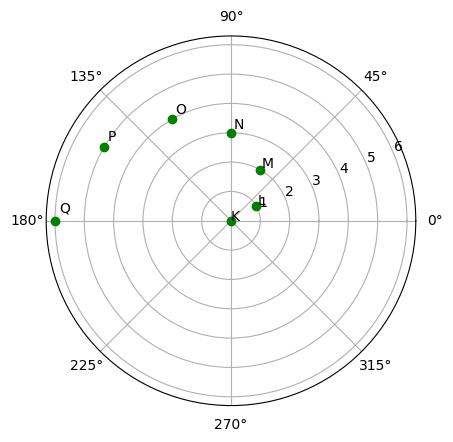

In [ ]:
n = 7
for k in range(n):
    phi = k * np.pi / 6
    plt.polar(phi, k, 'go')
    plt.annotate(chr(ord('K') + k), xy=(phi, k),
                 xytext=(phi, k), textcoords='offset points')
plt.savefig('my_first_picture.png')

Обратим внимание, что в полярной системе координат координаты - угол и радиус (расстояние от точки о начала координат), поэтому для координат подписей к точкам тоже нужно использовать такие полярные координаты, а не $x$ и $y$.
## Комплексно-сопряженное число
$$
\bar z = a - bi
$$
комплексно-сопряженное число для $z = a + bi$.
### Пример 9.
Найдем комплексно-сопряженные числа для $-3 + 2i$, $(\sqrt{2} - i)^3$, $(1 + i)^{1 / 3}$

In [ ]:
z_array = (-3 + 2 * I,
           (2 ** (sympy.S.Half) - 1 * I) ** 3,
           (1 + 1 * I) ** (1 / sympy.S(3)))
display(*[Latex(fr'z = {item},\ \bar z = {conjugate_item}') \
          for item, conjugate_item in\
          (map(latex, (z, sympy.re(z) - I * sympy.im(z))) for z in z_array)
          ])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Произведение комплексного числа и его комплексно-сопряженного
равно квадрату модуля комплексного числа.
### Пример 10.
Проверим $\bar z\cdot z = |z|^2$.

In [ ]:
a, b = sympy.symbols('a b', real=True)
z8 = a + b * I
display((sympy.conjugate(z8) * z8).simplify(), sympy.functions.Abs(z8) ** 2)

a**2 + b**2

a**2 + b**2